# <center> Análise das notas da P1 de CF - 2018/2

#### <center> profa. Dra. Fabíola Ribeiro

Nesse relatório analisamos a distribuição das notas de alunos do ciclo básico de Engenharia na disciplina Complementos de Física (CF). A nota final da prova é composta de 0 a 2 pontos de atividade e 0 a 8 pontos da prova em si. Na prova foram abordados os seguintes conteúdos: circuito RLC, indução eletromagnética, oscilações não amortecidas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
file="/mnt/sda/Documentos/notas_p1_cf2.csv"
np1 = pd.read_csv(file)

In [4]:
#np1.head()

## Presença na prova

In [5]:
# quantidade de alunos que compareceram
a=np1.NP1.str.contains('').sum()   #total de alunos na lista
b=np1.NP1.str.contains('NC').sum() #total de alunos que não compareceram
print("alunos presentes:", a-b)
print("alunos ausentes:", b)
print("presença:", round((a-b)/(a)*100,1), "%")

alunos presentes: 134
alunos ausentes: 49
presença: 73.2 %


Cerca de um de cada 4 alunos não compareceu à prova, por se tratar da primeira prova do semestre dessa matéria e pela sub ser aberta, não é uma frequência baixa.

In [6]:
# limpando os NC
np1['NP1']=np1.NP1.str.replace('NC','NaN').astype(float)
np1_c = np1.dropna(subset=['NP1'], how='any')
#np1_c contém as notas sem NC

In [7]:
#np1_c.head(15)

## Média e desvio padrão geral

In [8]:
#calculando médias
media=np1_c.NP1.mean()
desvpad=np1_c.NP1.std()
desvpad_av=desvpad/(a-b)**(1./2)
print('média geral:', round(media,2))
print('desvio padrão:', round(desvpad,2))
print('desvio padrão da média:', round(desvpad_av,2))


média geral: 5.46
desvio padrão: 2.19
desvio padrão da média: 0.19


A média geral das notas está próxima de 5, o que é razoável para uma prova onde as notas vão de 0 a 10. Note que esse valor é, na verdade, inferior, pois a nota final da prova é composta de 0 a 2 pontos de trabalho e 0 a 8 pontos de nota da prova. Nem todos os alunos atingiram os 2 pontos de nota de trabalho.

O desvio padrão evidencia uma dispersão considerável das notas ao redor da média.

Como valor médio da nota dos alunos nessa prova, temos NP1=5,46(19).

## Média e desvio padrão por turma

In [9]:
# médias por turma
np1_c.groupby("Turma").NP1.mean()

Turma
3P    5.053846
3Q    5.126087
4P    5.774286
4Q    5.060000
4R    5.587500
4S    5.789474
Name: NP1, dtype: float64

In [10]:
#desvio padrão por turma
np1_c.groupby("Turma").NP1.std()

Turma
3P    2.220967
3Q    2.258362
4P    2.256017
4Q    2.456227
4R    1.981943
4S    2.037126
Name: NP1, dtype: float64

Não notamos grandes discrepâncias quando comparamos as médias por turma. A maior média ocorreu nas turmas 4S e 4P, enquanto as menores médias ocorreram nas turmas 3P e 4S.

Quanto à dispersão, as notas se mostraram mais espalhadas na turma 4Q e menos espalhadas nas turmas 4R e 4S.

As médias e os desvios padrões são representados no gráfico a seguir.

In [11]:
#gráfico média por turma com desvio padrão
np1_c.groupby('Turma').mean().plot(kind='barh', xlim=(0,10), title="média por turma com desvio padrão", xerr=np1_c.groupby("Turma").NP1.std())

## Distribuição de notas

Nos gráficos a seguir são apresentados histogramas com a distribuição das notas. O primeiro histograma contém todas as notas, os seguintes são divididos por turma.

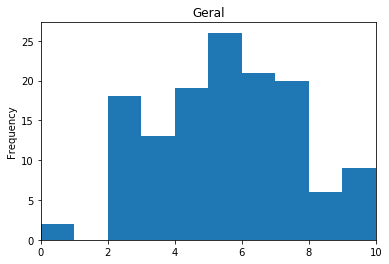

In [12]:
#histograma

np1_c['NP1'].plot(kind='hist', title="Geral", xlim=(0,10))


Temos uma concentração de notas na região central do histograma, com um maior número de notas entre 5 e 6. Note que tivemos apenas duas notas entre 0 e 1. Como a nota final é a composição da nota de trabalho, de 0 a 2, e da prova, de 0 a 8, esses alunos não entregaram o trabalho ou entregaram parcialmente.

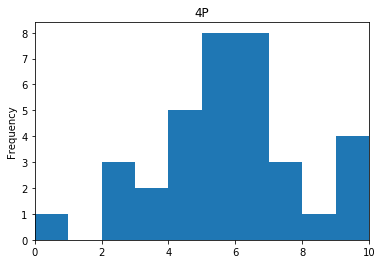

In [13]:
np1_c[np1_c.Turma=="4P"]['NP1'].plot(kind='hist', title="4P",xlim=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10])

Para a turma 4P temos apenas uma ocorrência de nota entre 0 e 2, e 4 ocorrências de nota entre 9 e 10. O pico do histograma é levemente assimétrico e tem máximo na nota 6.

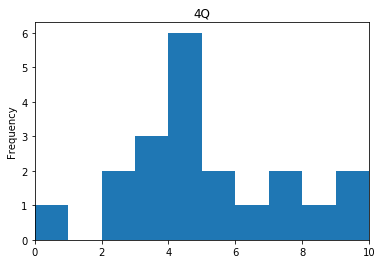

In [14]:
np1_c[np1_c.Turma=="4Q"]['NP1'].plot(kind='hist', title="4Q",xlim=(0,10),bins=[0,1,2,3,4,5,6,7,8,9,10])

Para a turma 4Q temos uma única ocorrência de nota entre 0 e 1 e duas ocorrências de nota entre 9 e 10. O pico do histograma é mais estreito e com máximo bem destacado entre 4 e 5.

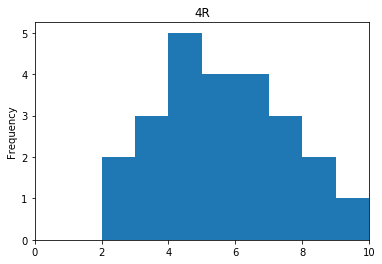

In [15]:
np1_c[np1_c.Turma=="4R"]['NP1'].plot(kind='hist', title="4R",xlim=(0,10),bins=[0,1,2,3,4,5,6,7,8,9,10])

Para a turma 4R temos um histograma mais largo, evidenciando uma variedade de notas. O pico tem seu máximo em notas entre 4 e 5.

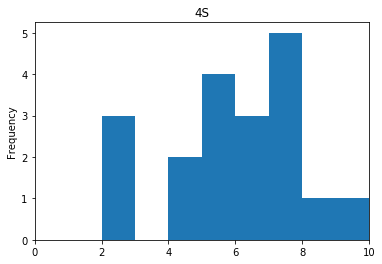

In [16]:
np1_c[np1_c.Turma=="4S"]['NP1'].plot(kind='hist', title="4S",xlim=(0,10),bins=[0,1,2,3,4,5,6,7,8,9,10])

Para a turma 4S o histograma não apresenta um único pico. Temos 3 provas com nota entre 2 e 3 e uma distribuição de notas entre 4 e 10. Esse segundo setor do histograma apresenta dois picos, um maior com notas entre 7 e 8 e um menor com notas entre 5 e 6.

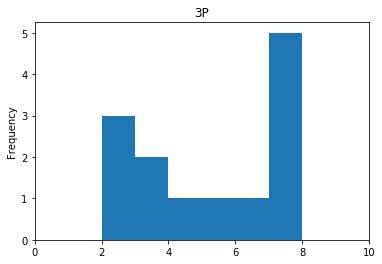

In [17]:
np1_c[np1_c.Turma=="3P"]['NP1'].plot(kind='hist', title="3P",xlim=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10])

O histograma das notas da turma 3P apresenta um comportamento interessante. Temos um pico destacado de notas entre 7 e 8, e outro menos destacado e mais espalhado com pico entre 2 e 3. Esses picos são unidos por uma distribuição uniforme de notas entre 4 e 7. Isso evidencia a presença de pelo menos dois grupos distintos de desempenho na prova.

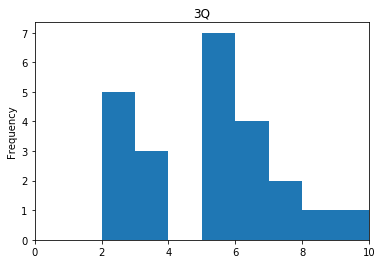

In [18]:
np1_c[np1_c.Turma=="3Q"]['NP1'].plot(kind='hist', title="3Q",xlim=(0,10),bins=[0,1,2,3,4,5,6,7,8,9,10])

O histograma das notas da turma 3Q também apresenta dois picos distintos e assimétricos. Temos um pico maior com máximo em notas entre 5 e 6, e outro menor com máximo de notas entre 2 e 3.

Na figura a seguir apresentamos os histogramas das diferentes turmas para melhor comparação.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa82e5aa9b0>,
      dtype=object)

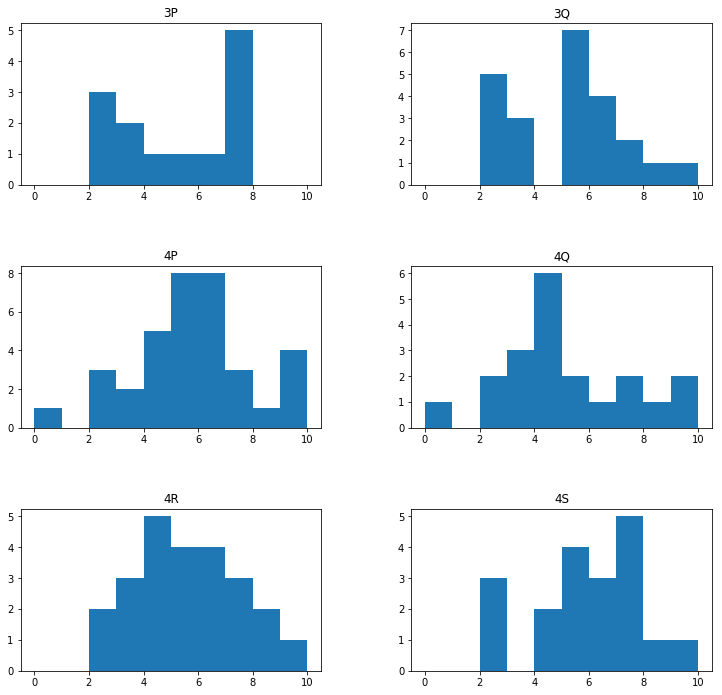

In [19]:
np1_c.hist(column='NP1', by="Turma", figsize=(12,12), bins=[0,1,2,3,4,5,6,7,8,9,10], xrot=1)

## Plotando histogramas por sala

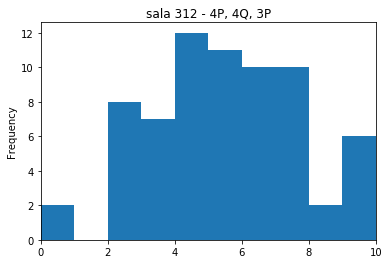

In [21]:
np1_a1=np1_c[np1_c.Turma=="4P"]
np1_a2=np1_c[np1_c.Turma=="4Q"]
np1_a3=np1_c[np1_c.Turma=="3P"]
sala312=[np1_a1,np1_a2,np1_a3]
sala312=pd.concat(sala312)

sala312['NP1'].plot(kind='hist', title="sala 312 - 4P, 4Q, 3P",xlim=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10])

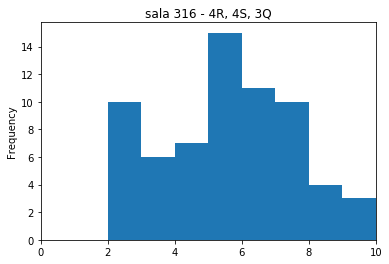

In [22]:
np1_a1=np1_c[np1_c.Turma=="4R"]
np1_a2=np1_c[np1_c.Turma=="4S"]
np1_a3=np1_c[np1_c.Turma=="3Q"]
sala316=[np1_a1,np1_a2,np1_a3]
sala316=pd.concat(sala316)

sala316['NP1'].plot(kind='hist', title="sala 316 - 4R, 4S, 3Q",xlim=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10])

## Média por sala

In [37]:
print("sala 312:", round(sala312.NP1.mean(),2), "+-", round(sala312.NP1.std()/(sala312.NP1.count())**(1./2),2))
print("sala 316:", round(sala316.NP1.mean(),2), "+-", round(sala316.NP1.std()/(sala316.NP1.count())**(1./2),2))



sala 312: 5.43 +- 0.28
sala 316: 5.48 +- 0.26


## Desvio padrão por sala

In [40]:
print("sala 312:", round(sala312.NP1.std(),2))
print("sala 316:", round(sala316.NP1.std(),2))

sala 312: 2.3
sala 316: 2.08


## Conclusões

A prova se mostrou eficiente no papel avaliativo a que se prestava, de forma que as notas dos alunos se localizaram  com média em 5,46(19). Não houve uma diferença significativa das notas médias comparando-se turma a turma. As médias e dispersão de notas por sala se mostraram equivalentes.


Analisando os histogramas podemos concluir que as diferentes turmas apresentam desempenho distinto nas provas, enquanto a turma 4R, por exemplo, apresenta um comportamento onde a maior parte dos alunos obteve nota próxima da média, enquanto em outras turmas, como na 3P, há evidentemente dois desempenhos distintos na prova.